In [5]:
import pandas as pd

taxi_fare = pd.read_csv('sample.csv')

In [4]:
taxi_fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-31 07:33:18.0000002,16.5,2015-05-31 07:33:18 UTC,-73.996986,40.755428,-73.953194,40.802101,3
1,2013-04-26 02:06:00.00000097,6.0,2013-04-26 02:06:00 UTC,-73.978778,40.753502,-73.973247,40.748147,1
2,2011-09-25 02:07:00.000000139,8.5,2011-09-25 02:07:00 UTC,0.000000,0.000000,0.000000,0.000000,1
3,2013-12-12 19:02:08.0000002,10.0,2013-12-12 19:02:08 UTC,-74.002595,40.737675,-73.987135,40.729482,1
4,2010-01-25 11:33:58.0000002,6.5,2010-01-25 11:33:58 UTC,-73.957698,40.764444,-73.973843,40.764355,1


In [7]:
min_pickup_date = taxi_fare['pickup_datetime'].min()

min_pickup_date

'2009-01-01 01:22:49 UTC'

In [9]:
max_pickup_date = taxi_fare['pickup_datetime'].max()

max_pickup_date

'2015-06-30 23:53:31 UTC'

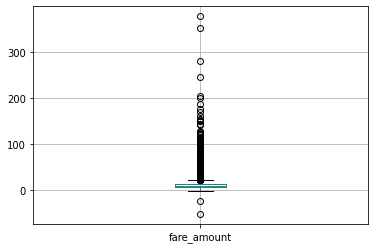

In [8]:
taxi_fare.boxplot(column=['fare_amount'], return_type='axes');

In [2]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('nyc/geo_export_19554bcf-3a41-41ec-93eb-34f68c419844.shp')

In [14]:
street_map['geometry']

0    MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...
1    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
2    MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...
3    MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...
4    MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...
Name: geometry, dtype: geometry

In [34]:
# designate coordinate system
taxi_subset = taxi_fare[taxi_fare['pickup_longitude'] != 0].head(100)
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(taxi_subset['pickup_longitude'], taxi_subset['pickup_latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(taxi_subset,
 geometry = geometry)

geo_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,geometry
0,2015-05-31 07:33:18.0000002,16.5,2015-05-31 07:33:18 UTC,-73.996986,40.755428,-73.953194,40.802101,3,POINT (-73.99699 40.75543)
1,2013-04-26 02:06:00.00000097,6.0,2013-04-26 02:06:00 UTC,-73.978778,40.753502,-73.973247,40.748147,1,POINT (-73.97878 40.75350)
3,2013-12-12 19:02:08.0000002,10.0,2013-12-12 19:02:08 UTC,-74.002595,40.737675,-73.987135,40.729482,1,POINT (-74.00259 40.73768)
4,2010-01-25 11:33:58.0000002,6.5,2010-01-25 11:33:58 UTC,-73.957698,40.764444,-73.973843,40.764355,1,POINT (-73.95770 40.76444)
5,2009-09-26 13:03:00.000000178,9.3,2009-09-26 13:03:00 UTC,-73.968447,40.767518,-73.989277,40.769453,5,POINT (-73.96845 40.76752)
...,...,...,...,...,...,...,...,...,...
101,2014-12-25 22:10:00.00000073,14.5,2014-12-25 22:10:00 UTC,-73.988720,40.759070,-73.967090,40.757130,1,POINT (-73.98872 40.75907)
102,2010-11-07 01:08:00.000000235,5.3,2010-11-07 01:08:00 UTC,-73.986918,40.733203,-73.991452,40.742208,1,POINT (-73.98692 40.73320)
103,2010-11-06 18:48:00.00000076,7.7,2010-11-06 18:48:00 UTC,-73.981877,40.746493,-73.964317,40.770035,5,POINT (-73.98188 40.74649)
104,2011-06-24 22:11:47.0000003,3.3,2011-06-24 22:11:47 UTC,-73.987218,40.743822,-73.993137,40.737399,1,POINT (-73.98722 40.74382)


In [35]:
taxi_subset

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,geometry
0,2015-05-31 07:33:18.0000002,16.5,2015-05-31 07:33:18 UTC,-73.996986,40.755428,-73.953194,40.802101,3,POINT (-73.99699 40.75543)
1,2013-04-26 02:06:00.00000097,6.0,2013-04-26 02:06:00 UTC,-73.978778,40.753502,-73.973247,40.748147,1,POINT (-73.97878 40.75350)
3,2013-12-12 19:02:08.0000002,10.0,2013-12-12 19:02:08 UTC,-74.002595,40.737675,-73.987135,40.729482,1,POINT (-74.00259 40.73768)
4,2010-01-25 11:33:58.0000002,6.5,2010-01-25 11:33:58 UTC,-73.957698,40.764444,-73.973843,40.764355,1,POINT (-73.95770 40.76444)
5,2009-09-26 13:03:00.000000178,9.3,2009-09-26 13:03:00 UTC,-73.968447,40.767518,-73.989277,40.769453,5,POINT (-73.96845 40.76752)
...,...,...,...,...,...,...,...,...,...
101,2014-12-25 22:10:00.00000073,14.5,2014-12-25 22:10:00 UTC,-73.988720,40.759070,-73.967090,40.757130,1,POINT (-73.98872 40.75907)
102,2010-11-07 01:08:00.000000235,5.3,2010-11-07 01:08:00 UTC,-73.986918,40.733203,-73.991452,40.742208,1,POINT (-73.98692 40.73320)
103,2010-11-06 18:48:00.00000076,7.7,2010-11-06 18:48:00 UTC,-73.981877,40.746493,-73.964317,40.770035,5,POINT (-73.98188 40.74649)
104,2011-06-24 22:11:47.0000003,3.3,2011-06-24 22:11:47 UTC,-73.987218,40.743822,-73.993137,40.737399,1,POINT (-73.98722 40.74382)


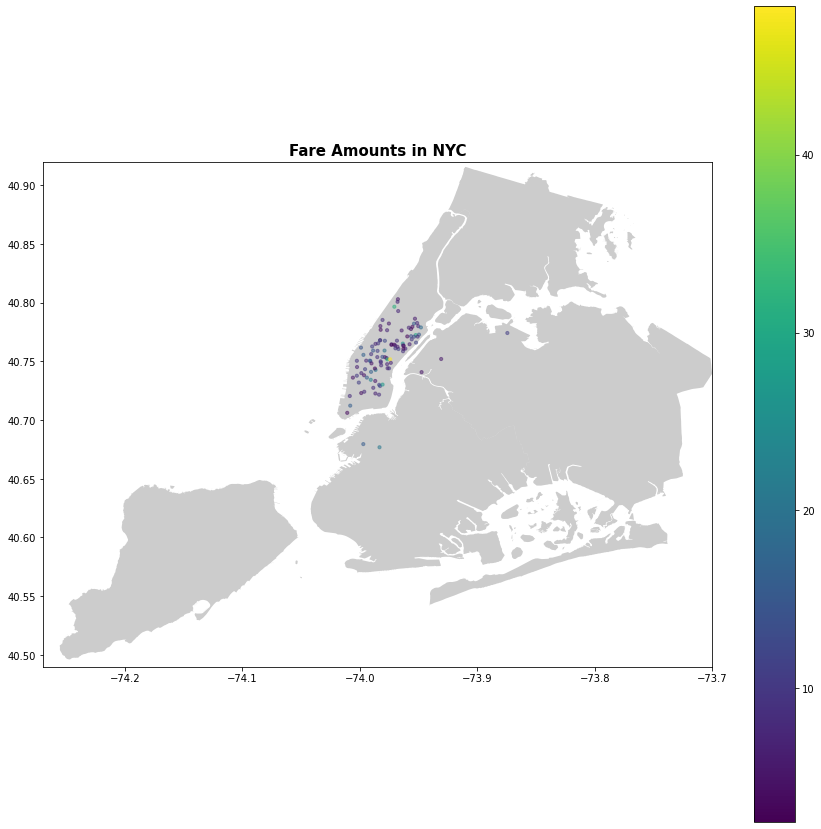

In [36]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='fare_amount',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Fare Amounts in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.27,-73.7)
plt.ylim(40.49,40.92)
# show map
plt.show()